# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
archive=pd.read_csv('twitter-archive-enhanced.csv')


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests
with requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')as req: 
    with open ('image-predictions.tsv','wb') as file:
        file.write(req.content)

predict_images=pd.read_csv('image-predictions.tsv',sep='\t')



3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
tweet_json=pd.read_json('tweet-json.txt',lines=True)
tweet_json=tweet_json.loc[:,['id','favorite_count','retweet_count']]
tweet_json.head(1)


,id,favorite_count,retweet_count
0,892420643555336193,39467,8853


In [4]:
#####Programatic assessment
#quality
archive[archive.retweeted_status_id.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


####Visual assessment

##quality
Pour faire le visual assessment des données, on print les bases des données et on essaie de tirer des observations concernant ces bases des données.

 
Pour le dataset "archive",ce dataset est composé de 2356 row et 17 lignes.Le scrollig de l'output de print montre que certaines colonnes de ces bases de données peuvent presenter un nombre important des NaN ( données manquantes) tel que in_reply_to_status_id et in_reply_to_user_id.

Egalement pour le meme dataset,a priori les champs des scores ne prentent pas des valeurs manquantes mais c'est à investiguer davantages avec le programmatic assessment et pour voir également s'il y' a des valeurs abbérantes.



#Tidiness
Tweet_json: le libellé de la colonne de l'indentifiant de tweet et "id" alors qu'il est "id_tweet" dans les deux autres database.

Les differentes datasets n'ont pas le meme nombre des lignes donc on a pas le meme niveaux d'information 

Les 4 dernieres colonnes de dataset archive presentent la meme information qui est le type du chien.


In [5]:
#####Programatic assessment
#quality
archive.head(3)
archive.info()
archive.columns
archive.describe()
archive.sample(5)
archive.rating_numerator.value_counts()
archive.rating_denominator.value_counts()

#predict_images
predict_images.head(3)
predict_images.info()
predict_images.columns
predict_images.describe()
predict_images.sample(5)
predict_images.p1_conf.value_counts()
predict_images.p2_conf.value_counts()
predict_images.p3_conf.value_counts()


#tweet_json
tweet_json.head(3)
tweet_json.info()
tweet_json.columns
tweet_json.describe()
tweet_json.sample(5)
tweet_json
tweet_json.favorite_count.value_counts()
tweet_json.retweet_count.value_counts()

tweet_json.sample(5)



#Les trois:
all_columns = pd.Series(list(archive) + list(predict_images) + list(tweet_json))
all_columns[all_columns.duplicated()]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

17    tweet_id
dtype: object

In [6]:
#Les trois:
all_columns = pd.Series(list(archive) + list(predict_images) + list(tweet_json))
all_columns[all_columns.duplicated()]


17    tweet_id
dtype: object

### Quality issues
1.Timestamp pour le dataset archive est un string

2.tweet_id le dataset archive est de type entier

3.expanded_urls pour le dataset archive contient des valeurs manquantes

4.retweeted_status_timestamp n'est pas de type date

5.Le denominateur dans le dataset archive est parfois différent de 10

6.Tweet Id doit etre un string pour le dataset predict_images

7.id should be string and not integer pour le dataset tweet_json

8.in_reply_to_user_id   should be string  

### Tidiness issues
1.Les 4 dernieres colonnes de archive doivent etre une seule

2.identifiant tweet est nommée id dans le tableau tweet_json alors qu'il est nommé tweet_id


## Cleaning Data


In [7]:
# Make copies of original pieces of data
#Eliminer les retweets de la base des données archive
archive=archive[archive.retweeted_status_id.isna()]
archive_clean=pd.DataFrame(archive.copy())
predict_images_clean=pd.DataFrame(predict_images.copy())
tweet_json_clean=pd.DataFrame(tweet_json.copy())

### Issue #1:

#### Define:
Convertir timestamp en date pour le dataset archive

#### Code

In [8]:
archive_clean.timestamp=pd.to_datetime(archive_clean.timestamp)

#### Test

In [9]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

### Issue #2:

#### Define
Convertir tweet_id en chaine de charactére pour le dataset archive

#### Code

In [10]:
archive_clean.tweet_id=archive_clean.tweet_id.astype(str)

#### Test

In [11]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), fl

### Issue #3:


#define

Eliminer les observations avec des valeurs manquantes pour les expanded_urls car leur nombre  n'est pas trés important.

In [12]:
#code
archive_clean=archive_clean.loc[archive_clean['expanded_urls'].notnull()]

In [13]:
#test
archive_clean.shape

(2117, 17)

### Issue #4:

#define

Convertir les retweeted_status_timestamp en date 

In [14]:
#code

archive_clean.retweeted_status_timestamp=pd.to_datetime(archive_clean.retweeted_status_timestamp)

In [15]:
#test

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: datetime64[ns

### Issue #5:

#define

Corriger les denominateurs de dataset archive à 10 

In [16]:
#code

archive_clean.rating_denominator=10

In [17]:
#test

(archive_clean.rating_denominator==10).all()

True

### Issue #6:

#define

Convertir tweet_id dans le dataset predict_images en string

In [18]:
#code

predict_images_clean.tweet_id=predict_images_clean.tweet_id.astype(str)

In [19]:
#test

predict_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #7:

#define

Convertir id de la dataset tweet_json en string 

In [20]:
#code

tweet_json_clean.id=tweet_json_clean.id.astype(str)

In [21]:
#test

tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Issue #8:

#define

Convertir in_reply_to_user_id de la dataset archive en string

In [22]:
#code

archive_clean.in_reply_to_user_id=archive_clean.in_reply_to_user_id.astype(str)

In [23]:
#test

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           2117 non-null object
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: datetime64[n

### Issue #9:

#define

Merger les 4 dernieres colonnes du tableau archive dans une seule variable nommé "type"

In [24]:
#code
import numpy as np
archive_clean = pd.melt(archive_clean, id_vars=archive.iloc[:,0:13],value_vars=["doggo", "floofer","pupper","puppo"],var_name="Phase", value_name="Value")
#archive_clean = archive_clean[archive_clean.Value != "None"]
archive_clean.columns
archive_clean.shape
#archive_clean.head(1)

(8468, 15)

In [25]:
#test
archive_clean.head(2)
archive_clean.columns
archive_clean.shape

(8468, 15)

### Issue #10:

#define

Convertir le libellé de la colonne 'id' du dataset tweet_json à 'tweet_id' 

In [26]:
#code

tweet_json_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

In [27]:
#test

tweet_json_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [28]:
# Note: axis=1 denotes that we are referring to a column, not a row
twitter_archive_master=archive_clean.merge(tweet_json_clean,how='inner', on='tweet_id')
twitter_archive_master=twitter_archive_master.merge(predict_images_clean,how='inner', on='tweet_id')
#with open ('twitter_archive_master.csv') as file:
        #file.write(twitter_archive_master)
twitter_archive_master.to_csv('twitter_archive_master.csv')


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [29]:
wrangled_data=pd.read_csv('twitter_archive_master.csv')
wrangled_data=wrangled_data.iloc[0:,1:]
wrangled_data.tail(2)
wrangled_data.shape





(7976, 28)

In [30]:
#Le chien avec le rating le plus elevé
wrangled_data.name[(wrangled_data.rating_numerator==max(wrangled_data.rating_numerator))]
#La race avec le retweet_count moyen le plus elevé
wrangled_data.groupby('p1').retweet_count.mean().sort_values()
#La race avec le rating_moyen_le_plus_elevé
#wrangled_data.groupby('p1').rating_numerator.mean().sort_values()



p1
desktop_computer        37.000000
crash_helmet            45.000000
platypus                71.000000
pitcher                 89.000000
piggy_bank              92.000000
hay                    102.000000
bib                    112.000000
trombone               115.000000
cuirass                207.000000
book_jacket            219.000000
fire_engine            243.000000
ping-pong_ball         249.000000
bearskin               250.000000
lorikeet               261.000000
African_crocodile      276.000000
boathouse              278.000000
Arctic_fox             281.500000
Brabancon_griffon      287.666667
pot                    306.000000
soccer_ball            311.000000
king_penguin           319.000000
bighorn                325.000000
traffic_light          336.000000
coho                   339.000000
ibex                   341.000000
sea_urchin             350.000000
seashore               352.333333
three-toed_sloth       368.000000
lynx                   381.000000
leaf_beetle

### Insights:
1.Atticus est le chien avec le rating le plus élévé

2.upright est la race des chiens avec le nombre de retweet moyen le plus élévé(la première prévision semblent etre une mauvaises prédiction du l'algorithme de prevision car il s'agit d'une race de chameau et non pas une race des chiens à ma connaissance)

3.Le clumber est la race des chiens avec le rating moyen le plus élévé(Les 3 premières prévisions semblent etre des mauvaises prédiction du l'algorithme de prevision car il s'agit des objets et non pas des races des chiens à ma connaissance)

### Visualization

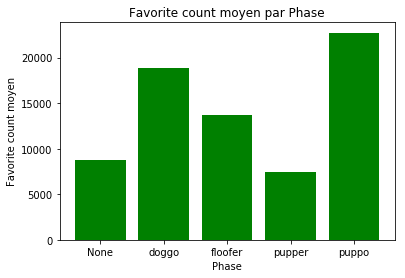

In [34]:
#Bar chart de favorite_count par phase en pourcentage
import matplotlib.pyplot as plt
#%matplotlib.pyplot inline
favorite_count_phase=wrangled_data.groupby('Value').mean().favorite_count
x=list(favorite_count_phase.index)
y=favorite_count_phase
plt.bar(x, y, color='g')
plt.xlabel("Phase")
plt.ylabel("Favorite count moyen")
plt.title("Favorite count moyen par Phase")
plt.show()

